In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
cb_wr=pd.read_csv('additional_data/cb_wr.csv')
cb_wr=cb_wr.drop(columns='Unnamed: 0')
cb_wr.head()

KeyboardInterrupt: 

#### Add targeted reciever for each play

In [ ]:
target = pd.read_csv('nfl-big-data-bowl-2021-bonus/targetedReceiver.csv')
target.head()

#### Merge the dataframes

In [8]:
df = cb_wr.merge(target, on=['gameId','playId'])
df.head()

,time,x,y,s,a,dis,o,dir,event,nflId,...,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI,homeTeamFlag,teamAbbr,positionGroup,targetNflId
0,2018-09-07T04:24:05.500Z,16.41,14.79,0.00,0.00,0.00,283.60,213.69,None,2495454.0,...,NaN,I,0,0,-4.197485,False,0,ATL,WR,2495454.0
1,2018-09-07T04:24:05.500Z,15.82,13.77,0.00,0.00,0.00,286.99,171.95,None,2533040.0,...,NaN,I,0,0,-4.197485,False,0,ATL,WR,2495454.0
2,2018-09-07T04:24:05.500Z,10.62,13.45,0.23,0.46,0.02,117.98,229.12,None,2552689.0,...,NaN,I,0,0,-4.197485,False,1,PHI,DB,2495454.0
3,2018-09-07T04:24:05.500Z,12.57,36.36,0.34,0.53,0.03,104.95,82.22,None,2555383.0,...,NaN,I,0,0,-4.197485,False,1,PHI,DB,2495454.0
4,2018-09-07T04:24:05.500Z,11.25,15.54,0.01,0.22,0.01,95.28,252.57,None,2557958.0,...,NaN,I,0,0,-4.197485,False,1,PHI,DB,2495454.0


In [36]:
df.shape

(6874495, 53)

In [10]:
# DONT USE THIS
# dictionary with each game as key and play as a value
#play_dict={}

#game_play = df[['gameId','playId']].drop_duplicates()

#games = game_play['gameId'].tolist()
#plays = list(game_play['playId'])

#play_dict = {games[i]: plays[i] for i in range(len(games))} 
#play_dict
#play_dict = [{k:v} for k, v in game_play.iloc[:,[0,1]].values]

#### Import Realtive info weeks

In [59]:
# Concat all relative week data csv files
import glob
import os
os.chdir("/Users/DRNPRO/Documents/GitHub/APM-Term-Project/additional_data/realtive_info/")
extension = 'csv'
all_filenames = [i for i in glob.glob('Relative_Info_Week*.{}'.format(extension))]
relative_df = pd.concat([pd.read_csv(f) for f in all_filenames ])
relative_df.shape

(17092915, 12)

In [63]:
relative_df=relative_df.drop(columns='Unnamed: 0')
relative_df.head()


,gameId,playId,frameId,nflId,Opp_Dist,closestOpp_Id,Team_Dist,closestTeam_Id,QB_Dist,closestQB_Id,FootDist
0,2018101800,96,1,494307.0,17.555184,2559248.0,10.716604,2532898.0,21.280359,2560858.0,17.405683
1,2018101800,96,1,2495202.0,5.111008,2553435.0,6.498138,2550930.0,7.322739,2560858.0,5.288875
2,2018101800,96,1,2506106.0,4.550011,2530510.0,4.983172,2559248.0,11.464903,2560858.0,11.425625
3,2018101800,96,1,2507917.0,7.598066,2560711.0,5.919206,2555550.0,20.026026,2560858.0,18.144073
4,2018101800,96,1,2530510.0,4.550011,2506106.0,7.339244,2532898.0,13.230155,2560858.0,11.701115


In [20]:
#merged = df.merge(relative_df, on=['gameId','playId','frameId'])

In [21]:
#play_f2a

In [22]:
# import only week 1
relative_1 = pd.read_csv('Relative_Info_Week 1.csv')
relative_1

,Unnamed: 0,gameId,playId,frameId,nflId,Opp_Dist,closestOpp_Id,Team_Dist,closestTeam_Id,QB_Dist,closestQB_Id,FootDist
0,0,2018090600,75,1,310.0,6.100525,2558175.0,3.400235,2559033.0,0.000000,310.0,1.629969
1,1,2018090600,75,1,79848.0,1.916899,2533040.0,5.867759,2552315.0,10.203215,310.0,9.697051
2,2,2018090600,75,1,2495454.0,7.380474,2555383.0,8.030255,2533040.0,17.494128,310.0,17.354357
3,3,2018090600,75,1,2495613.0,4.983252,2555415.0,3.929377,2552689.0,7.147867,310.0,6.153503
4,4,2018090600,75,1,2533040.0,1.916899,79848.0,8.030255,2495454.0,9.527481,310.0,9.324103
...,...,...,...,...,...,...,...,...,...,...,...,...
919104,919104,2018091001,4192,65,2552488.0,10.676371,2552487.0,9.314940,2540197.0,25.149101,2543499.0,25.665171
919105,919105,2018091001,4192,65,2556277.0,0.940479,2556885.0,2.323984,2558183.0,17.849190,2543499.0,0.872067
919106,919106,2018091001,4192,65,2556593.0,3.967896,2550597.0,1.998650,2558183.0,14.136891,2543499.0,4.606191
919107,919107,2018091001,4192,65,2556885.0,0.940479,2556277.0,4.002249,2534241.0,18.789457,2543499.0,0.291548


In [25]:
merged_week1 = df.merge(relative_1, on=['gameId','playId','frameId','nflId'])
merged_week1=merged_week1.drop(columns='Unnamed: 0')
merged_week1.shape

(369925, 60)

In [27]:
merged_week1.head()

,time,x,y,s,a,dis,o,dir,event,nflId,...,teamAbbr,positionGroup,targetNflId,Opp_Dist,closestOpp_Id,Team_Dist,closestTeam_Id,QB_Dist,closestQB_Id,FootDist
0,2018-09-07T04:24:05.500Z,16.41,14.79,0.00,0.00,0.00,283.60,213.69,None,2495454.0,...,ATL,WR,2495454.0,5.214221,2557958.0,1.178346,2533040.0,9.396936,310.0,9.270302
1,2018-09-07T04:24:05.500Z,15.82,13.77,0.00,0.00,0.00,286.99,171.95,None,2533040.0,...,ATL,WR,2495454.0,4.900796,2557958.0,1.178346,2495454.0,10.566272,310.0,10.219051
2,2018-09-07T04:24:05.500Z,10.62,13.45,0.23,0.46,0.02,117.98,229.12,None,2552689.0,...,PHI,DB,2495454.0,5.209837,2533040.0,2.182888,2557958.0,13.732170,310.0,11.405481
3,2018-09-07T04:24:05.500Z,12.57,36.36,0.34,0.53,0.03,104.95,82.22,None,2555383.0,...,PHI,DB,2495454.0,3.889383,2560854.0,6.121479,2495613.0,14.883068,310.0,12.645568
4,2018-09-07T04:24:05.500Z,11.25,15.54,0.01,0.22,0.01,95.28,252.57,None,2557958.0,...,PHI,DB,2495454.0,4.900796,2533040.0,2.182888,2552689.0,11.816197,310.0,9.237770


In [28]:
merged_week1.iloc[0]

time                                               2018-09-07T04:24:05.500Z
x                                                                     16.41
y                                                                     14.79
s                                                                         0
a                                                                         0
dis                                                                       0
o                                                                     283.6
dir                                                                  213.69
event                                                                  None
nflId                                                           2.49545e+06
displayName                                                     Julio Jones
jerseyNumber                                                             11
position                                                                 WR
frameId     

In [35]:
game = 2018090600
play = 4472

game1 = merged_week1.loc[(merged_week1['gameId']==game) & (merged_week1['playId']==play)].sort_values(by='frameId',ascending=True)
game1 = game1.sort_index()
game1.iloc[0]

time                                               2018-09-07T04:24:05.500Z
x                                                                     16.41
y                                                                     14.79
s                                                                         0
a                                                                         0
dis                                                                       0
o                                                                     283.6
dir                                                                  213.69
event                                                                  None
nflId                                                           2.49545e+06
displayName                                                     Julio Jones
jerseyNumber                                                             11
position                                                                 WR
frameId     

In [38]:
game1.columns

Index(['time', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event', 'nflId',
       'displayName', 'jerseyNumber', 'position', 'frameId', 'team', 'gameId',
       'playId', 'playDirection', 'route', 'gameDate', 'gameTimeEastern',
       'homeTeamAbbr', 'visitorTeamAbbr', 'week', 'playDescription', 'quarter',
       'down', 'yardsToGo', 'possessionTeam', 'playType', 'yardlineSide',
       'yardlineNumber', 'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers',
       'passResult', 'offensePlayResult', 'playResult', 'epa', 'isDefensivePI',
       'homeTeamFlag', 'teamAbbr', 'positionGroup', 'targetNflId', 'Opp_Dist',
       'closestOpp_Id', 'Team_Dist', 'closestTeam_Id', 'QB_Dist',
       'closestQB_Id', 'FootDist'],
      dtype='object')

In [64]:
relative_df.head()

,gameId,playId,frameId,nflId,Opp_Dist,closestOpp_Id,Team_Dist,closestTeam_Id,QB_Dist,closestQB_Id,FootDist
0,2018101800,96,1,494307.0,17.555184,2559248.0,10.716604,2532898.0,21.280359,2560858.0,17.405683
1,2018101800,96,1,2495202.0,5.111008,2553435.0,6.498138,2550930.0,7.322739,2560858.0,5.288875
2,2018101800,96,1,2506106.0,4.550011,2530510.0,4.983172,2559248.0,11.464903,2560858.0,11.425625
3,2018101800,96,1,2507917.0,7.598066,2560711.0,5.919206,2555550.0,20.026026,2560858.0,18.144073
4,2018101800,96,1,2530510.0,4.550011,2506106.0,7.339244,2532898.0,13.230155,2560858.0,11.701115


['time',
 'x',
 'y',
 's',
 'a',
 'dis',
 'o',
 'dir',
 'event',
 'nflId',
 'displayName',
 'jerseyNumber',
 'position',
 'frameId',
 'team',
 'gameId',
 'playId',
 'playDirection',
 'route',
 'gameDate',
 'gameTimeEastern',
 'homeTeamAbbr',
 'visitorTeamAbbr',
 'week',
 'playDescription',
 'quarter',
 'down',
 'yardsToGo',
 'possessionTeam',
 'playType',
 'yardlineSide',
 'yardlineNumber',
 'offenseFormation',
 'personnelO',
 'defendersInTheBox',
 'numberOfPassRushers',
 'personnelD',
 'typeDropback',
 'preSnapVisitorScore',
 'preSnapHomeScore',
 'gameClock',
 'absoluteYardlineNumber',
 'penaltyCodes',
 'penaltyJerseyNumbers',
 'passResult',
 'offensePlayResult',
 'playResult',
 'epa',
 'isDefensivePI',
 'homeTeamFlag',
 'teamAbbr',
 'positionGroup',
 'targetNflId']

In [ ]:
##############################################################################################

### Get a dataframe of all CBs and WRs at ballsnap

In [86]:
# col = df.columns.tolist()
# master_df = pd.DataFrame(np.zeros((0,len(col))), columns=col)
# games = df['gameId'].unique().tolist()


# for i in games:
#     temp_df = df[df['gameId']==i]
#     plays = temp_df['playId'].unique().tolist()
#     for y in plays:
#         temp2_df = temp_df[temp_df['playId']==y]
#         temp3_df = temp2_df[temp2_df['event']=='ball_snap']
#         master_df = master_df.append(temp3_df).reset_index(drop=True)

In [ ]:
master_df

In [ ]:
##############################################################################################

In [67]:
df1 = df[['gameId','playId','frameId','nflId','targetNflId','position','teamAbbr','event','x','y']]
df1.shape

(6874495, 10)

In [ ]:
plays = list(game_play['playId'])

for i in plays:
    w_df = df1[df1['playId']==i]
    w_df = w_df[w_df['event']=='ball_snap']
    
    #min_index = df1[df1['event']=='ball_snap'].index.min()
    #max_index = df2[df2['event']=='pass_arrived'].index.max()
print('First pass_forward index and last pass_arrived index:', '\n(', min_index,',', max_index,')')

In [55]:
# For each team, export a csv that contains all data for which that team is on offense
os.chdir("/Users/DRNPRO/Documents/GitHub/APM-Term-Project/nfl-big-data-bowl-2021/team_plays")
for team in teams:=
    df = weeks_merged[weeks_merged['possessionTeam']==team]
    df.to_csv(team+'_plays.csv')

,time,x,y,s,a,dis,o,dir,event,nflId,...,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI,homeTeamFlag,teamAbbr,positionGroup,targetNflId
0,2018-09-07T04:24:05.500Z,16.41,14.79,0.00,0.00,0.00,283.60,213.69,None,2495454.0,...,NaN,I,0,0,-4.197485,False,0,ATL,WR,2495454.0
1,2018-09-07T04:24:05.500Z,15.82,13.77,0.00,0.00,0.00,286.99,171.95,None,2533040.0,...,NaN,I,0,0,-4.197485,False,0,ATL,WR,2495454.0
2,2018-09-07T04:24:05.500Z,10.62,13.45,0.23,0.46,0.02,117.98,229.12,None,2552689.0,...,NaN,I,0,0,-4.197485,False,1,PHI,DB,2495454.0
3,2018-09-07T04:24:05.500Z,12.57,36.36,0.34,0.53,0.03,104.95,82.22,None,2555383.0,...,NaN,I,0,0,-4.197485,False,1,PHI,DB,2495454.0
4,2018-09-07T04:24:05.500Z,11.25,15.54,0.01,0.22,0.01,95.28,252.57,None,2557958.0,...,NaN,I,0,0,-4.197485,False,1,PHI,DB,2495454.0


#### Get specific game and play


In [11]:
game = 2018090600
play = 4472

df1 = df.loc[(df['gameId']==game) & (df['playId']==play)].sort_values(by='frameId',ascending=True)
df1 = df1.sort_index()

#### Find indexes with first occurence of 'pass_forward' and last occurence of 'pass_arrived' 


In [50]:
df2 = df1[['gameId','playId','frameId','nflId','targetNflId','position','teamAbbr','event','x','y']]
df2=df2.sort_index()
min_index = df2[df2['event']=='pass_forward'].index.min()
max_index = df2[df2['event']=='pass_arrived'].index.max()
print('First pass_forward index and last pass_arrived index:', '\n(', min_index,',', max_index,')')

First pass_forward index and last pass_arrived index: 
( 186 , 275 )


#### New dataframe of all frames with WRs and CBs starting with pass thrown ending when pass arrived

In [51]:
play_f2a = df2.iloc[min_index:max_index+1]
play_f2a

,gameId,playId,frameId,nflId,targetNflId,position,teamAbbr,event,x,y
186,2018090600,4472,32,2495454.0,2495454.0,WR,ATL,pass_forward,10.10,7.33
187,2018090600,4472,32,2533040.0,2495454.0,WR,ATL,pass_forward,10.21,13.09
188,2018090600,4472,32,2552689.0,2495454.0,CB,PHI,pass_forward,8.26,7.96
189,2018090600,4472,32,2555383.0,2495454.0,CB,PHI,pass_forward,10.90,40.87
190,2018090600,4472,32,2557958.0,2495454.0,CB,PHI,pass_forward,9.94,12.44
...,...,...,...,...,...,...,...,...,...,...
271,2018090600,4472,46,2533040.0,2495454.0,WR,ATL,pass_arrived,10.27,12.08
272,2018090600,4472,46,2552689.0,2495454.0,CB,PHI,pass_arrived,5.45,0.99
273,2018090600,4472,46,2555383.0,2495454.0,CB,PHI,pass_arrived,10.85,41.18
274,2018090600,4472,46,2557958.0,2495454.0,CB,PHI,pass_arrived,9.29,10.29


#### Dataframe with targeted wide reciever

In [37]:
play_wr_df = play_f2a[(play_f2a.position == 'WR') & play_f2a.nflId.isin(play_f2a.targetNflId)]
play_wr_df

,gameId,playId,frameId,nflId,targetNflId,position,teamAbbr,event,x,y
186,2018090600,4472,32,2495454.0,2495454.0,WR,ATL,pass_forward,10.10,7.33
192,2018090600,4472,33,2495454.0,2495454.0,WR,ATL,None,9.63,6.78
198,2018090600,4472,34,2495454.0,2495454.0,WR,ATL,None,9.19,6.24
204,2018090600,4472,35,2495454.0,2495454.0,WR,ATL,None,8.78,5.71
210,2018090600,4472,36,2495454.0,2495454.0,WR,ATL,None,8.40,5.19
216,2018090600,4472,37,2495454.0,2495454.0,WR,ATL,None,8.03,4.69
222,2018090600,4472,38,2495454.0,2495454.0,WR,ATL,None,7.68,4.21
228,2018090600,4472,39,2495454.0,2495454.0,WR,ATL,None,7.36,3.74
234,2018090600,4472,40,2495454.0,2495454.0,WR,ATL,None,7.01,3.18
240,2018090600,4472,41,2495454.0,2495454.0,WR,ATL,None,6.73,2.73


#### Dataframe with corner backs

In [15]:
play_cb_df = play_f2a[(play_f2a.position == 'CB')]
play_cb_df

,gameId,playId,frameId,nflId,targetNflId,position,teamAbbr,event,x,y
188,2018090600,4472,32,2552689.0,2495454.0,CB,PHI,pass_forward,8.26,7.96
189,2018090600,4472,32,2555383.0,2495454.0,CB,PHI,pass_forward,10.90,40.87
190,2018090600,4472,32,2557958.0,2495454.0,CB,PHI,pass_forward,9.94,12.44
194,2018090600,4472,33,2552689.0,2495454.0,CB,PHI,None,8.02,7.43
195,2018090600,4472,33,2555383.0,2495454.0,CB,PHI,None,10.86,40.96
196,2018090600,4472,33,2557958.0,2495454.0,CB,PHI,None,9.77,12.28
200,2018090600,4472,34,2552689.0,2495454.0,CB,PHI,None,7.77,6.89
201,2018090600,4472,34,2555383.0,2495454.0,CB,PHI,None,10.84,41.02
202,2018090600,4472,34,2557958.0,2495454.0,CB,PHI,None,9.61,12.14
206,2018090600,4472,35,2552689.0,2495454.0,CB,PHI,None,7.52,6.35


In [16]:
#cb_wr = cb_wr[(cb_wr.event == 'pass_forward') | (cb_wr.event == 'pass_arrived')]

In [17]:
df2.dtypes

gameId           int64
playId           int64
frameId          int64
nflId          float64
targetNflId    float64
position        object
teamAbbr        object
event           object
x              float64
y              float64
dtype: object

In [41]:
pos = pd.read_csv('nfl-big-data-bowl-2021/play_by_play_2018.csv')
pos.columns

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (172,173,174,175,184,185,188,189,194,195,196,197,209,210,211,232,233,237,238,239,244,246,247,277) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       ...
       'receiver_id', 'name', 'jersey_number', 'id', 'qb_epa', 'xyac_epa',
       'xyac_mean_yardage', 'xyac_median_yardage', 'xyac_success', 'xyac_fd'],
      dtype='object', length=340)

In [43]:
pos.iloc[2]

play_id                             52
game_id                2018_01_ATL_PHI
old_game_id                 2018090600
home_team                          PHI
away_team                          ATL
                            ...       
xyac_epa                           NaN
xyac_mean_yardage                  NaN
xyac_median_yardage                NaN
xyac_success                       NaN
xyac_fd                            NaN
Name: 2, Length: 340, dtype: object

In [46]:
pos2 = pd.read_csv('nfl-big-data-bowl-2021/play_by_play_2018 copy.csv')
len(pos2.columns)

340

KeyboardInterrupt: 

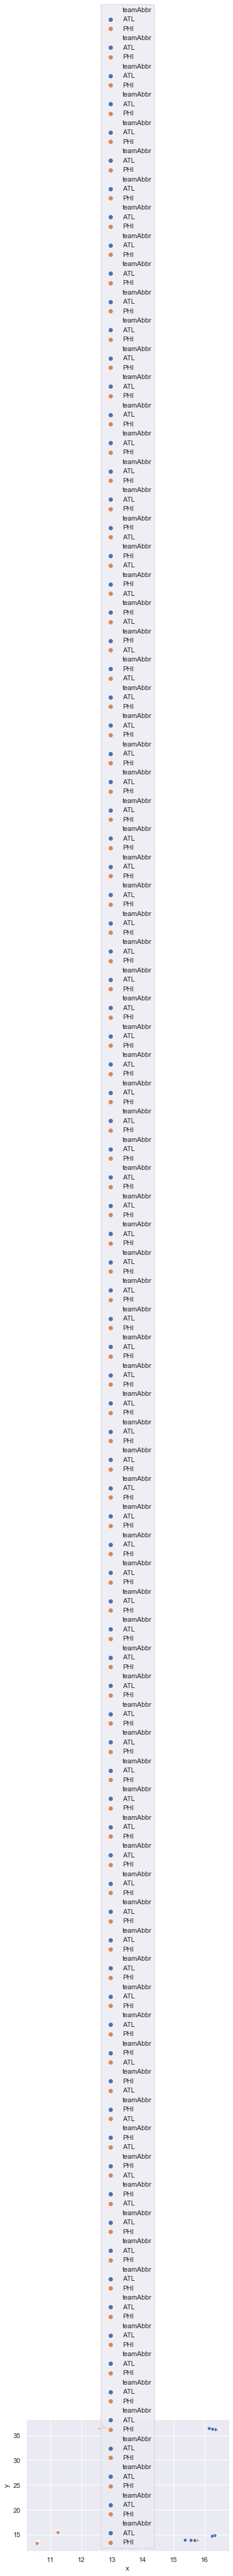

In [303]:
# # get specific frame
# frame = 52

# sns.set()

# for frame in df2['frameId']:
#     df3 = df2[df2['frameId']==frame]
#     g = sns.scatterplot(x="x", y="y",
#               hue="teamAbbr",
#               data=df3)

Text(0.5, 0.98, 'Frame by frame')

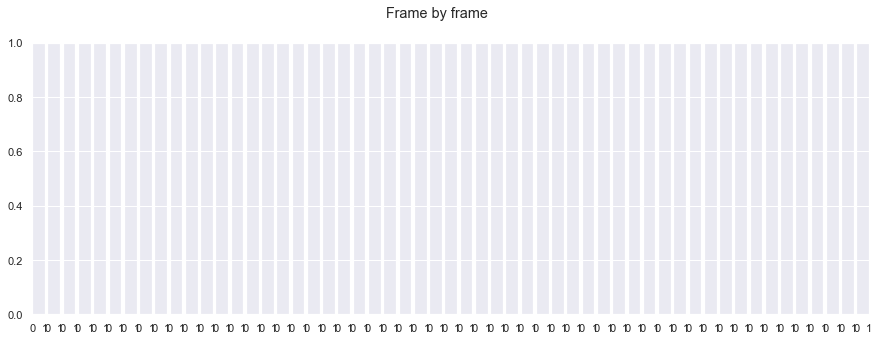

In [310]:
# total_frames = len(df2['frameId'].unique())

# fig, axes = plt.subplots(1, total_frames, figsize=(15, 5), sharey=True)
# fig.suptitle('Frame by frame')

In [296]:
df1.frameId.unique()

array([52, 70])

### OLD STUFF

In [106]:
# df1 = df[df['gameId']==2018123015]

In [118]:
# df2 = df1[['playId','frameId','position','teamAbbr','x','y']]

In [ ]:
# for each play:
    # for each frame in a play:
        # plot the x,y coordinates of CBs a WRs (teams in different colors)

In [119]:
# play = 4057
# frame = 70

# testdf = df2[df2['playId']==play][df2['frameId']==frame]
# testdf

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,playId,frameId,position,teamAbbr,x,y
145222,4104,70,CB,ARI,65.39,26.03
145223,4104,70,WR,SEA,66.38,10.55
145224,4104,70,CB,ARI,69.42,3.25
145225,4104,70,WR,SEA,80.98,3.39
145226,4104,70,WR,SEA,63.77,25.46


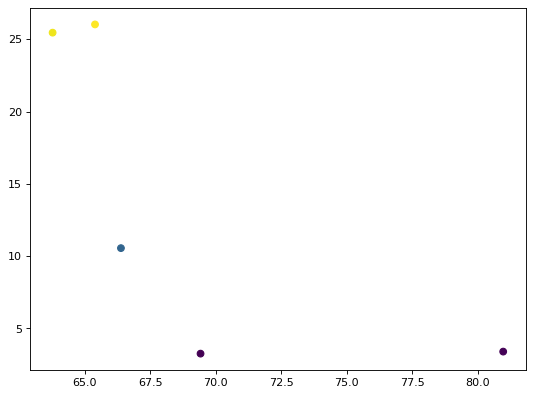

In [125]:
# from matplotlib.pyplot import figure
# figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# plt.scatter(testdf['x'], testdf['y'], c=testdf['y'])

frameId
21    AxesSubplot(0.125,0.125;0.775x0.755)
25    AxesSubplot(0.125,0.125;0.775x0.755)
29    AxesSubplot(0.125,0.125;0.775x0.755)
30    AxesSubplot(0.125,0.125;0.775x0.755)
31    AxesSubplot(0.125,0.125;0.775x0.755)
32    AxesSubplot(0.125,0.125;0.775x0.755)
34    AxesSubplot(0.125,0.125;0.775x0.755)
36    AxesSubplot(0.125,0.125;0.775x0.755)
38    AxesSubplot(0.125,0.125;0.775x0.755)
40    AxesSubplot(0.125,0.125;0.775x0.755)
45    AxesSubplot(0.125,0.125;0.775x0.755)
46    AxesSubplot(0.125,0.125;0.775x0.755)
47    AxesSubplot(0.125,0.125;0.775x0.755)
50    AxesSubplot(0.125,0.125;0.775x0.755)
58    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

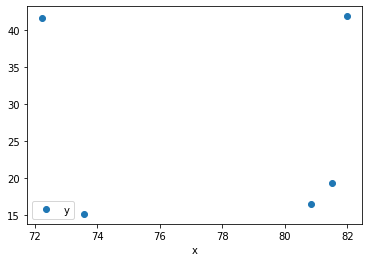

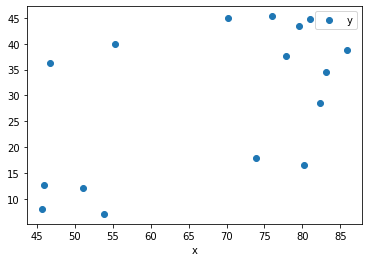

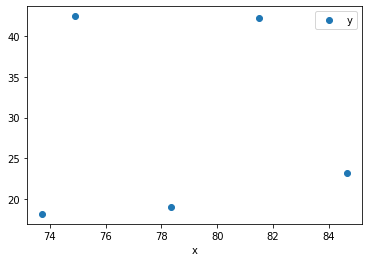

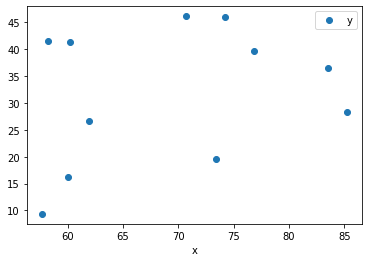

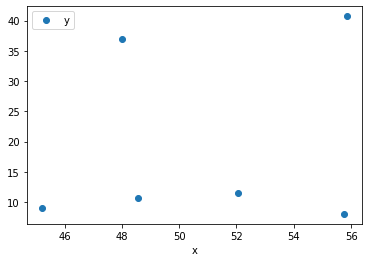

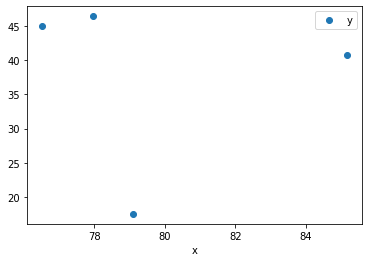

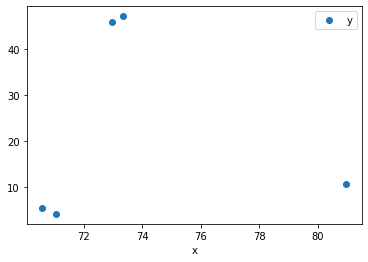

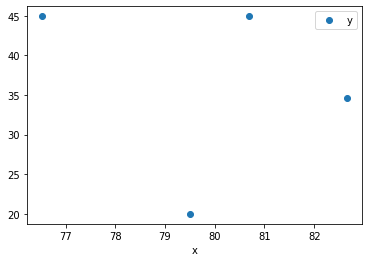

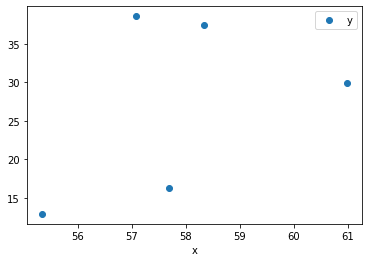

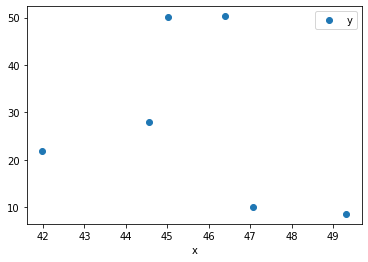

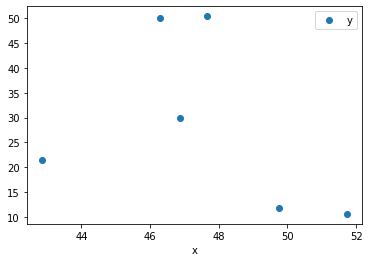

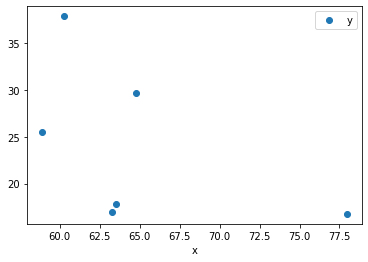

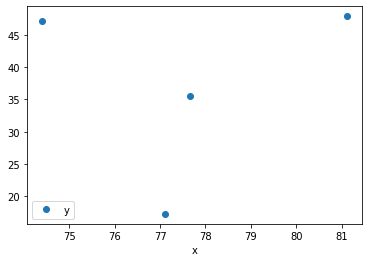

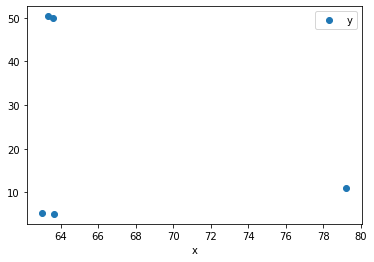

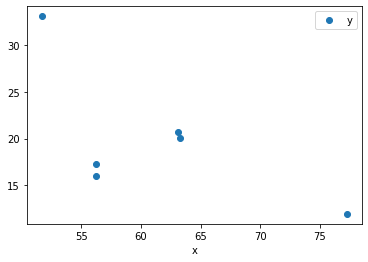

In [86]:
# df1.groupby('frameId').plot(x='x', y='y', style='o')

In [124]:
# from matplotlib.pyplot import figure
# figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [48]:
# # Python code to find Euclidean distance 
# # using linalg.norm() 

# # intializing points in 
# # numpy arrays 
# point1 = np.array((96.43, 96.43)) 
# point2 = np.array((1, 1, 1)) 

# # calculating Euclidean distance 
# # using linalg.norm() 
# dist = np.linalg.norm(point1 - point2) 

# # printing Euclidean distance 
# print(dist) 

(120720, 53)